In [1]:
%cd /home/lcc/projects/MetaHarmonizer

/home/lcc/projects/MetaHarmonizer


In [2]:
import nest_asyncio

nest_asyncio.apply()

In [3]:
import pandas as pd
from src.Engine import get_ontology_engine

OntoMapEngine = get_ontology_engine()

In [4]:
from evaluation.calc_stats import CalcStats

calc = CalcStats()

In [5]:
from src.utils.cleanup_vector_store import cleanup_vector_store, drop_table

# drop_table("src/KnowledgeDb/vector_db.sqlite", "synonym_disease")
# cleanup_vector_store("rag", "biolord", "bodysite")

In [5]:
df = pd.read_csv("data/corpus/cbio_body_site/body_site_query_for_NCIT:C32221.csv")
large_corpus = pd.read_csv(
    'data/corpus/cbio_body_site/body_site_corpus_from_NCIT:C32221.csv')

query_list = df['original_value'].tolist()
small_corpus_list = df['curated_ontology'].tolist() 
large_corpus_list = (
    large_corpus["official_label"].tolist()
    if "official_label" in large_corpus.columns
    else large_corpus["label"].tolist()
)

cura_map = dict(zip(df['original_value'], df['curated_ontology']))

In [ ]:
# run rag strategy:
other_params = {"test_or_prod": "test"}
onto_engine_large = OntoMapEngine(category='bodysite',
                                  topk=5,
                                  query=query_list,
                                  corpus=large_corpus_list,
                                  cura_map=cura_map,
                                  s2_method="mt-sap-bert",
                                  s2_strategy="st",
                                  s3_method="medcpt-article",
                                  s3_strategy="rag",
                                  s3_threshold=1.1,
                                  corpus_df=large_corpus,
                                  **other_params)
medcpt_rag_bodysite_result = onto_engine_large.run()

08/12/2025 05:39:20 PM - INFO - OntoMapEngine: `official_label` not found — using `label` as fallback.
08/12/2025 05:39:20 PM - INFO - OntoMapEngine: `clean_code` not found — generated from `obo_id`.
08/12/2025 05:39:20 PM - INFO - OntoMapEngine: Initialized OntoMap Engine
08/12/2025 05:39:20 PM - INFO - OntoMapEngine: Stage 1: Exact matching
08/12/2025 05:39:20 PM - INFO - OntoMapEngine: Stage 2: ST
08/12/2025 05:39:20 PM - INFO - OntoMapEngine: Stage 2.5: Synonym matching (confidence>=0.9)
08/12/2025 05:39:20 PM - INFO - OntoMapEngine: Stage 3: RAG (threshold=0.8)
08/12/2025 05:39:20 PM - INFO - OntoMapEngine: ==================================================
08/12/2025 05:39:20 PM - INFO - OntoMapEngine: Starting Ontology Mapping
08/12/2025 05:39:20 PM - INFO - OntoMapEngine: ==================================================
08/12/2025 05:39:20 PM - INFO - OntoMapEngine: Stage 1: Exact Matching
08/12/2025 05:39:20 PM - INFO - OntoMapEngine: Exact matches: 74
08/12/2025 05:39:20 PM

Fetching 11 files:   0%|          | 0/11 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/608 [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/74.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

LICENSE: 0.00B [00:00, ?B/s]

.gitattributes: 0.00B [00:00, ?B/s]

README.md: 0.00B [00:00, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

No sentence-transformers model found with name model_cache/medcpt-query. Creating a new one with mean pooling.


Successfully downloaded ncbi/MedCPT-Query-Encoder to model_cache/medcpt-query


Batches:   0%|          | 0/16 [00:00<?, ?it/s]

Batches:   0%|          | 0/16 [00:00<?, ?it/s]

Batches:   0%|          | 0/16 [00:00<?, ?it/s]

Batches:   0%|          | 0/16 [00:00<?, ?it/s]

Batches:   0%|          | 0/16 [00:00<?, ?it/s]

Batches:   0%|          | 0/16 [00:00<?, ?it/s]

Batches:   0%|          | 0/16 [00:00<?, ?it/s]

Batches:   0%|          | 0/16 [00:00<?, ?it/s]

Batches:   0%|          | 0/16 [00:00<?, ?it/s]

Batches:   0%|          | 0/16 [00:00<?, ?it/s]

Batches:   0%|          | 0/16 [00:00<?, ?it/s]

Batches:   0%|          | 0/16 [00:00<?, ?it/s]

Batches:   0%|          | 0/16 [00:00<?, ?it/s]

Batches:   0%|          | 0/16 [00:00<?, ?it/s]

Batches:   0%|          | 0/16 [00:00<?, ?it/s]

Batches:   0%|          | 0/16 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

No sentence-transformers model found with name ncbi/MedCPT-Query-Encoder. Creating a new one with mean pooling.


config.json:   0%|          | 0.00/608 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

added_tokens.json:   0%|          | 0.00/74.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

08/12/2025 05:40:06 PM - INFO - OntoMapEngine: Stage 2 completed: 365 queries
08/12/2025 05:40:06 PM - INFO - OntoMapEngine: Stage 2.5: Synonym Verification for Low Confidence Results
08/12/2025 05:40:06 PM - INFO - OntoMapEngine: Found 180 low-confidence queries (score < 0.9) for synonym verification
08/12/2025 05:40:07 PM - INFO - OntoMapSynonym: Warm run: Checking synonym index for 'bodysite'
08/12/2025 05:40:07 PM - INFO - OntoMapSynonym: Found 4128 unique NCI codes in corpus_df
08/12/2025 05:40:07 PM - INFO - SynonymDict: 📥 Fetching synonyms for 4128 new codes (skipping 0 already indexed)
08/12/2025 05:40:07 PM - INFO - SynonymDict: Fetching concept data for 4128 codes
08/12/2025 05:40:07 PM - INFO - NCIDb: Fetching concept data for 4128 codes in batches of 50
08/12/2025 05:40:09 PM - INFO - NCIDb: Processed batch 1 of 83
08/12/2025 05:40:11 PM - INFO - NCIDb: Processed batch 2 of 83
08/12/2025 05:40:14 PM - INFO - NCIDb: Processed batch 3 of 83
08/12/2025 05:40:17 PM - INFO - NCI

Extracting synonyms:   0%|          | 0/4128 [00:00<?, ?it/s]

08/12/2025 05:44:02 PM - INFO - SynonymDict: Extracted 4128 synonyms from 4128 codes
08/12/2025 05:44:02 PM - INFO - SynonymDict: Inserting records into SQLite...
08/12/2025 05:44:02 PM - INFO - SynonymDict: Building FAISS index...


Embedding batches:   0%|          | 0/9 [00:00<?, ?it/s]

Batches:   0%|          | 0/32 [00:00<?, ?it/s]

Batches:   0%|          | 0/32 [00:00<?, ?it/s]

Batches:   0%|          | 0/32 [00:00<?, ?it/s]

Batches:   0%|          | 0/32 [00:00<?, ?it/s]

Batches:   0%|          | 0/32 [00:00<?, ?it/s]

Batches:   0%|          | 0/32 [00:00<?, ?it/s]

Batches:   0%|          | 0/32 [00:00<?, ?it/s]

Batches:   0%|          | 0/32 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

08/12/2025 05:44:09 PM - INFO - SynonymDict: ✅ FAISS index built with 4128 vectors
08/12/2025 05:44:09 PM - INFO - OntoMapSynonym: Searching synonyms for 180 queries


Batches:   0%|          | 0/12 [00:00<?, ?it/s]

08/12/2025 05:44:09 PM - INFO - OntoMapSynonym: Synonym matching complete for 180 queries
08/12/2025 05:44:09 PM - INFO - OntoMapEngine: Boosted 'EPIDURAL': S2_top1=Epidural Spinal Canal Space(0.824) → Combined_top1=Epidural Spinal Space(0.861), match_level: 1 → 2
08/12/2025 05:44:09 PM - INFO - OntoMapEngine: Boosted 'LUNG, BONE': S2_top1=Bone(0.848) → Combined_top1=Bone(0.848), match_level: 1 → 1
08/12/2025 05:44:09 PM - INFO - OntoMapEngine: Stage 2.5: Boosted 2 queries with synonyms
08/12/2025 05:44:09 PM - INFO - OntoMapEngine: Stage 3: RAG Matching
08/12/2025 05:44:09 PM - INFO - OntoMapEngine: Queries with top1_score < 0.8: 41
08/12/2025 05:44:09 PM - INFO - OntoMapRAG: Initialized OntoMapRAG module
08/12/2025 05:44:09 PM - INFO - OntoMapRAG: Generating results table


/home/lcc/projects/MetaHarmonizer/src/Engine/ontology_mapping_engine.py:399: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  s2_res.at[idx, 'stage'] = 2.5


Fetching 11 files:   0%|          | 0/11 [00:00<?, ?it/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/608 [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/74.0 [00:00<?, ?B/s]

.gitattributes: 0.00B [00:00, ?B/s]

LICENSE: 0.00B [00:00, ?B/s]

README.md: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

No sentence-transformers model found with name model_cache/medcpt-article. Creating a new one with mean pooling.


Successfully downloaded ncbi/MedCPT-Article-Encoder to model_cache/medcpt-article
08/12/2025 05:44:34 PM - INFO - FAISSSQLiteSearch: 4128 new terms to add to the index.
08/12/2025 05:44:34 PM - INFO - FAISSSQLiteSearch: Using provided DataFrame to update term-code pairs.
08/12/2025 05:44:34 PM - INFO - FAISSSQLiteSearch: Using provided DataFrame to fetch term-code pairs.
08/12/2025 05:44:34 PM - INFO - FAISSSQLiteSearch: Retrieved codes for 4128 terms
08/12/2025 05:44:34 PM - INFO - FAISSSQLiteSearch: Fetching concept data for 4128 unique codes
08/12/2025 05:44:34 PM - INFO - NCIDb: Fetching concept data for 4128 codes in batches of 50
08/12/2025 05:44:38 PM - INFO - NCIDb: Processed batch 1 of 83
08/12/2025 05:44:39 PM - INFO - NCIDb: Processed batch 2 of 83
08/12/2025 05:44:42 PM - INFO - NCIDb: Processed batch 3 of 83
08/12/2025 05:44:45 PM - INFO - NCIDb: Processed batch 4 of 83
08/12/2025 05:44:47 PM - INFO - NCIDb: Processed batch 5 of 83
08/12/2025 05:44:50 PM - INFO - NCIDb: Pr

Building context and records:   0%|          | 0/4128 [00:00<?, ?it/s]

08/12/2025 05:48:30 PM - INFO - FAISSSQLiteSearch: Inserting 4128 records into SQLite
08/12/2025 05:48:30 PM - INFO - FAISSSQLiteSearch: Starting vector embedding and FAISS index insertion


Embedding batches:   0%|          | 0/9 [00:00<?, ?it/s]

Batches:   0%|          | 0/32 [00:00<?, ?it/s]

Batches:   0%|          | 0/32 [00:00<?, ?it/s]

Batches:   0%|          | 0/32 [00:00<?, ?it/s]

Batches:   0%|          | 0/32 [00:00<?, ?it/s]

Batches:   0%|          | 0/32 [00:00<?, ?it/s]

Batches:   0%|          | 0/32 [00:00<?, ?it/s]

Batches:   0%|          | 0/32 [00:00<?, ?it/s]

Batches:   0%|          | 0/32 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

08/12/2025 05:48:40 PM - INFO - FAISSSQLiteSearch: Finished fetching and storing all terms.
08/12/2025 05:48:40 PM - INFO - OntoMapRAG: True - Vector store initialized for method=medcpt-article, category=bodysite, om_strategy=rag


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

08/12/2025 05:48:41 PM - INFO - OntoMapRAG: Results Generated
08/12/2025 05:48:41 PM - INFO - OntoMapEngine: Stage 3 completed: 41 queries
08/12/2025 05:48:41 PM - INFO - OntoMapEngine: ==================================================
08/12/2025 05:48:41 PM - INFO - OntoMapEngine: FINAL SUMMARY
08/12/2025 05:48:41 PM - INFO - OntoMapEngine: ==================================================
08/12/2025 05:48:41 PM - INFO - OntoMapEngine: Stage 1 (Exact): 74 queries
08/12/2025 05:48:41 PM - INFO - OntoMapEngine: Stage 2 (ST): 322 queries
08/12/2025 05:48:41 PM - INFO - OntoMapEngine: Stage 2.5 (Synonym boost): 2 queries
08/12/2025 05:48:41 PM - INFO - OntoMapEngine: Stage 3 (RAG): 41 queries


In [8]:
medcpt_rag_bodysite_result_eval = calc.calc_accuracy(
    medcpt_rag_bodysite_result)
medcpt_rag_bodysite_result_eval

,Accuracy Level,Accuracy
0,Top 1 Match,55.808656
1,Top 3 Matches,69.931663
2,Top 5 Matches,75.170843


In [6]:
import sqlite3
import pandas as pd

# Path to your SQLite DB
db_path = "src/KnowledgeDb/vector_db.sqlite"

# Connect to DB
conn = sqlite3.connect(db_path)

# Query 10 random rows
query = """
SELECT *
FROM rag_bie_pubmed_bert_disease
ORDER BY RANDOM()
LIMIT 10;
"""

df = pd.read_sql_query(query, conn)

# Save to CSV
df.to_csv("sample_rag_bie_pubmed_bert_disease.csv", index=False)

conn.close()

print("Saved to sample_rag_bie_pubmed_bert_disease.csv")


Saved to sample_rag_bie_pubmed_bert_disease.csv


In [15]:
import re

def prettify_context(ctx: str) -> str:
    """Turn structured context into more natural language form."""
    if not isinstance(ctx, str):
        return ""

    # ==== 1) Extract all sections ====
    sections = {}
    
    # Split by known field names
    field_names = ['definitions:', 'parents:', 'children:', 'roles:', 'stages:']
    
    # Extract name (everything before first colon-field)
    name = ctx.split('definitions:', 1)[0].split('parents:', 1)[0].split('children:', 1)[0].split('roles:', 1)[0].strip().rstrip(':')
    
    # Extract definitions
    if 'definitions:' in ctx:
        start = ctx.find('definitions:') + len('definitions:')
        rest = ctx[start:]
        # Find next field
        next_field_pos = len(rest)
        for field in ['parents:', 'children:', 'roles:', 'stages:']:
            pos = rest.find(field)
            if pos != -1 and pos < next_field_pos:
                next_field_pos = pos
        sections['definitions'] = rest[:next_field_pos].strip().strip('.')
    
    # Extract parents
    if 'parents:' in ctx:
        start = ctx.find('parents:') + len('parents:')
        rest = ctx[start:]
        next_field_pos = len(rest)
        for field in ['children:', 'roles:', 'stages:', 'definitions:']:
            pos = rest.find(field)
            if pos != -1 and pos < next_field_pos:
                next_field_pos = pos
        sections['parents'] = rest[:next_field_pos].strip().strip('.')
    
    # Extract children
    if 'children:' in ctx:
        start = ctx.find('children:') + len('children:')
        rest = ctx[start:]
        next_field_pos = len(rest)
        for field in ['roles:', 'stages:', 'definitions:', 'parents:']:
            pos = rest.find(field)
            if pos != -1 and pos < next_field_pos:
                next_field_pos = pos
        sections['children'] = rest[:next_field_pos].strip().strip('.')
    
    # Extract roles
    if 'roles:' in ctx:
        start = ctx.find('roles:') + len('roles:')
        rest = ctx[start:]
        next_field_pos = len(rest)
        for field in ['stages:', 'definitions:', 'parents:', 'children:']:
            pos = rest.find(field)
            if pos != -1 and pos < next_field_pos:
                next_field_pos = pos
        sections['roles'] = rest[:next_field_pos].strip().strip('.')

    sentences = []

    # ==== 2) Definitions sentence ====
    if sections.get('definitions'):
        sentences.append(f"{name} is defined as: {sections['definitions']}.")

    # ==== 3) Parents sentence ====
    if sections.get('parents'):
        plist = [p.strip() for p in sections['parents'].split(';') if p.strip()]
        if len(plist) == 1:
            sentences.append(f"It is a subtype of {plist[0]}.")
        elif len(plist) == 2:
            sentences.append(f"It is classified under {plist[0]} and {plist[1]}.")
        else:
            sentences.append(f"It is classified under {', '.join(plist[:-1])}, and {plist[-1]}.")

    # ==== 4) Children sentence ====
    if sections.get('children'):
        clist = [c.strip() for c in sections['children'].split(';') if c.strip()]
        if len(clist) == 1:
            sentences.append(f"It includes the subtype: {clist[0]}.")
        elif len(clist) == 2:
            sentences.append(f"Subtypes include {clist[0]} and {clist[1]}.")
        else:
            sentences.append(f"Subtypes include {', '.join(clist[:-1])}, and {clist[-1]}.")

    # ==== 5) Parse roles into natural language ====
    if sections.get('roles'):
        roles_text = sections['roles']
        
        # Parse roles: split by pattern "Word_Word:" or "Word:"
        role_pattern = r'([A-Z][A-Za-z_]*?):\s*([^:]+?)(?=\s+[A-Z][A-Za-z_]*?:|$)'
        matches = re.findall(role_pattern, roles_text)
        
        if matches:
            role_sentences = []
            for role_name, role_values in matches:
                # Clean up role name
                role_label = role_name.replace('_', ' ')
                
                # Parse values (separated by semicolons)
                vals = [v.strip() for v in role_values.split(';') if v.strip()]
                if not vals:
                    continue
                
                # Format values
                if len(vals) == 1:
                    vals_str = vals[0]
                elif len(vals) == 2:
                    vals_str = f"{vals[0]} and {vals[1]}"
                else:
                    vals_str = ', '.join(vals[:-1]) + f", and {vals[-1]}"
                
                role_sentences.append(f"{role_label}: {vals_str}")
            
            if role_sentences:
                sentences.append("Key characteristics - " + "; ".join(role_sentences) + ".")

    return " ".join(sentences)

In [16]:
import pandas as pd

df = pd.read_csv("sample_rag_bie_pubmed_bert_disease.csv")
df["context_natural"] = df["context"].apply(prettify_context)
df.to_csv("sample_rag_bie_pubmed_bert_disease_with_natural.csv", index=False)
df

,id,term,code,context,context_natural
0,12286,Undifferentiated Pleomorphic Sarcoma with Oste...,C8380,Undifferentiated Pleomorphic Sarcoma with Oste...,Undifferentiated Pleomorphic Sarcoma with Oste...
1,7050,Locally Advanced Head and Neck Cutaneous Squam...,C180891,Locally Advanced Head and Neck Cutaneous Squam...,Locally Advanced Head and Neck Cutaneous Squam...
2,7433,Eyelid Melanoma,C4358,Eyelid Melanoma: definitions: A melanoma that ...,Eyelid Melanoma is defined as: A melanoma that...
3,6826,"Recurrent Salivary Gland Adenocarcinoma, Not O...",C199663,"Recurrent Salivary Gland Adenocarcinoma, Not O...","Recurrent Salivary Gland Adenocarcinoma, Not O..."
4,5187,Gastric Lymphoma,C4636,Gastric Lymphoma: definitions: An extranodal l...,Gastric Lymphoma is defined as: An extranodal ...
5,5222,Postneoadjuvant Therapy Stage II Gastric Cance...,C133671,Postneoadjuvant Therapy Stage II Gastric Cance...,Postneoadjuvant Therapy Stage II Gastric Cance...
6,12899,Adenocarcinoma with Squamous Metaplasia,C4200,Adenocarcinoma with Squamous Metaplasia: defin...,Adenocarcinoma with Squamous Metaplasia is def...
7,4769,Small Intestinal Squamous Cell Carcinoma,C43534,Small Intestinal Squamous Cell Carcinoma: defi...,Small Intestinal Squamous Cell Carcinoma is de...
8,3217,Recurrent Digestive System Neuroendocrine Carc...,C155938,Recurrent Digestive System Neuroendocrine Carc...,Recurrent Digestive System Neuroendocrine Carc...
9,6804,Malignant Mixed Tumor of the Minor Salivary Gland,C5955,Malignant Mixed Tumor of the Minor Salivary Gl...,Malignant Mixed Tumor of the Minor Salivary Gl...


Total records: 10

Encoding contexts...


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


Overall Statistics:
Average similarity (original):     0.9564
Average similarity (natural):      0.9586
Average difference (natural-orig): 0.0022

Std dev (original):  0.0108
Std dev (natural):   0.0105

Natural format better: 10 (100.0%)
Original format better: 0 (0.0%)
Same: 0

All results (sorted by difference, natural - original):

📈 Term: Postneoadjuvant Therapy Stage II Gastric Cancer AJ...
   Code: C133671
   Original: 0.9573 | Natural: 0.9627 | Diff: +0.0054

📈 Term: Eyelid Melanoma...
   Code: C4358
   Original: 0.9455 | Natural: 0.9493 | Diff: +0.0038

📈 Term: Recurrent Salivary Gland Adenocarcinoma, Not Other...
   Code: C199663
   Original: 0.9603 | Natural: 0.9632 | Diff: +0.0029

📈 Term: Small Intestinal Squamous Cell Carcinoma...
   Code: C43534
   Original: 0.9503 | Natural: 0.9525 | Diff: +0.0022

📈 Term: Adenocarcinoma with Squamous Metaplasia...
   Code: C4200
   Original: 0.9558 | Natural: 0.9577 | Diff: +0.0019

📈 Term: Locally Advanced Head and Neck Cutaneous Squ

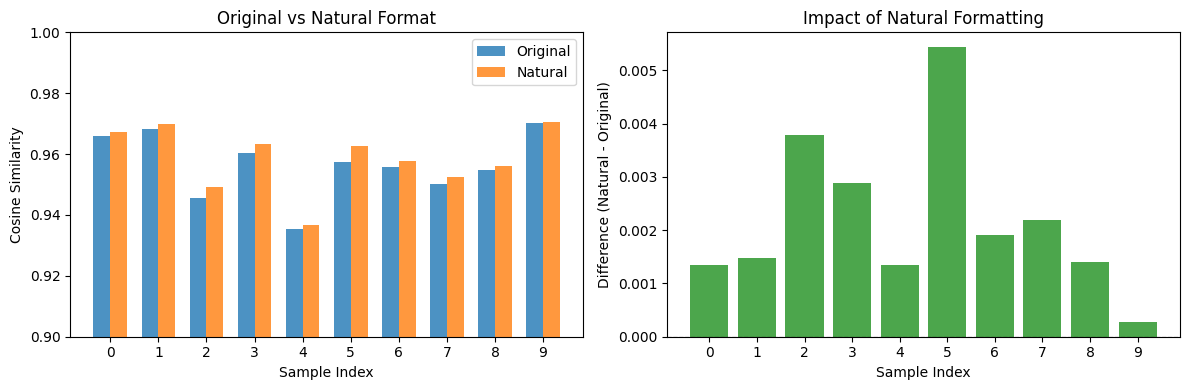

In [18]:
import pandas as pd
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# 加载数据
df = pd.read_csv('sample_rag_bie_pubmed_bert_disease_with_natural.csv')

print(f"Total records: {len(df)}")

# 加载模型
model = SentenceTransformer('pritamdeka/S-PubMedBert-MS-MARCO')

print(f"\nEncoding contexts...")

# 编码所有文本
term_embeddings = model.encode(df['term'].tolist(), show_progress_bar=True)
context_embeddings = model.encode(df['context'].tolist(), show_progress_bar=True)
context_natural_embeddings = model.encode(df['context_natural'].tolist(), show_progress_bar=True)

# 计算相似度
results = []
for i in range(len(df)):
    term_emb = term_embeddings[i].reshape(1, -1)
    context_emb = context_embeddings[i].reshape(1, -1)
    context_natural_emb = context_natural_embeddings[i].reshape(1, -1)

    # term vs context (原始)
    sim_original = cosine_similarity(term_emb, context_emb)[0][0]

    # term vs context_natural (格式化)
    sim_natural = cosine_similarity(term_emb, context_natural_emb)[0][0]

    results.append({
        'term': df.iloc[i]['term'],
        'code': df.iloc[i]['code'],
        'sim_original': sim_original,
        'sim_natural': sim_natural,
        'diff': sim_natural - sim_original
    })

# 转成DataFrame
results_df = pd.DataFrame(results)

# 统计分析
print("\n" + "="*70)
print("Overall Statistics:")
print("="*70)
print(f"Average similarity (original):     {results_df['sim_original'].mean():.4f}")
print(f"Average similarity (natural):      {results_df['sim_natural'].mean():.4f}")
print(f"Average difference (natural-orig): {results_df['diff'].mean():.4f}")
print(f"\nStd dev (original):  {results_df['sim_original'].std():.4f}")
print(f"Std dev (natural):   {results_df['sim_natural'].std():.4f}")

# 看看哪种更好
natural_better = (results_df['diff'] > 0).sum()
original_better = (results_df['diff'] < 0).sum()
same = (results_df['diff'] == 0).sum()

print(f"\nNatural format better: {natural_better} ({natural_better/len(results_df)*100:.1f}%)")
print(f"Original format better: {original_better} ({original_better/len(results_df)*100:.1f}%)")
print(f"Same: {same}")

# 显示所有结果，按差异排序
print("\n" + "="*70)
print("All results (sorted by difference, natural - original):")
print("="*70)
results_sorted = results_df.sort_values('diff', ascending=False)
for idx, row in results_sorted.iterrows():
    indicator = "📈" if row['diff'] > 0 else "📉" if row['diff'] < 0 else "➡️"
    print(f"\n{indicator} Term: {row['term'][:50]}...")
    print(f"   Code: {row['code']}")
    print(f"   Original: {row['sim_original']:.4f} | Natural: {row['sim_natural']:.4f} | Diff: {row['diff']:+.4f}")

# 保存结果
# results_df.to_csv('similarity_comparison_results.csv', index=False)
# print(f"\n\nResults saved to: similarity_comparison_results.csv")

# 可视化
try:
    import matplotlib.pyplot as plt

    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # 对比图
    x = np.arange(len(results_df))
    width = 0.35

    axes[0].bar(x - width / 2,
                results_df['sim_original'],
                width,
                label='Original',
                alpha=0.8)
    axes[0].bar(x + width / 2,
                results_df['sim_natural'],
                width,
                label='Natural',
                alpha=0.8)
    axes[0].set_xlabel('Sample Index')
    axes[0].set_ylabel('Cosine Similarity')
    axes[0].set_title('Original vs Natural Format')
    axes[0].legend()
    axes[0].set_xticks(x)
    axes[0].set_ylim(0.9, 1.0)

    # 差异图
    colors = [
        'green' if d > 0 else 'red' if d < 0 else 'gray'
        for d in results_df['diff']
    ]
    axes[1].bar(x, results_df['diff'], color=colors, alpha=0.7)
    axes[1].axhline(y=0, color='black', linestyle='--', linewidth=0.8)
    axes[1].set_xlabel('Sample Index')
    axes[1].set_ylabel('Difference (Natural - Original)')
    axes[1].set_title('Impact of Natural Formatting')
    axes[1].set_xticks(x)

    plt.tight_layout()
    plt.savefig('similarity_comparison.png', dpi=300)
    print("Visualization saved to: similarity_comparison.png")

except ImportError:
    print("\nmatplotlib not available, skipping visualization")